We use opendatasets to directly download Dataset from Kaggle using Username , API Key.

In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od

In [ ]:
data_set_url='https://www.kaggle.com/datasets/nabeelqureshitiii/student-performance-dataset'

**Downloading our Dataset**

In [ ]:
od.download(data_set_url)

Skipping, found downloaded files in "./student-performance-dataset" (use force=True to force download)


**Importing required py Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Converting csv data into DataFrame**

In [ ]:
df=pd.read_csv('/content/student-performance-dataset/student_performance.csv')

In [ ]:
print(df.head())

   student_id  weekly_self_study_hours  attendance_percentage  \
0           1                     18.5                   95.6   
1           2                     14.0                   80.0   
2           3                     19.5                   86.3   
3           4                     25.7                   70.2   
4           5                     13.4                   81.9   

   class_participation  total_score grade  
0                  3.8         97.9     A  
1                  2.5         83.9     B  
2                  5.3        100.0     A  
3                  7.0        100.0     A  
4                  6.9         92.0     A  


Features (Inputs)

••  weekly_self_study_hours

••  attendance_percentage

••  class_participation


Targets (Outputs)

•••  total_score - continuous - Regression

•••  grade - categorical - Classification

In [ ]:
df.shape


(1000000, 6)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


**No missing Values^**

In [ ]:
df.describe()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278933,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


from matplotlib import pyplot as plt
_df_0['student_id'].plot(kind='hist', bins=20, title='student_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['weekly_self_study_hours'].plot(kind='hist', bins=20, title='weekly_self_study_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['attendance_percentage'].plot(kind='hist', bins=20, title='attendance_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['class_participation'].plot(kind='hist', bins=20, title='class_participation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='student_id', y='weekly_self_study_hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='weekly_self_study_hours', y='attendance_percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='attendance_percentage', y='class_participation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='class_participation', y='total_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['student_id'].plot(kind='line', figsize=(8, 4), title='student_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['weekly_self_study_hours'].plot(kind='line', figsize=(8, 4), title='weekly_self_study_hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['attendance_percentage'].plot(kind='line', figsize=(8, 4), title='attendance_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['class_participation'].plot(kind='line', figsize=(8, 4), title='class_participation')
plt.gca().spines[['top', 'right']].set_visible(False)

student_id is useless for prediction.


In [ ]:
df = df.drop(columns=['student_id'])


**Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 7.161333476729997
RMSE: 8.996400873369833
R2 Score: 0.6600425865640975


In [29]:
import pandas as pd

importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values(ascending=False)

,0
weekly_self_study_hours,1.816820
attendance_percentage,0.000402
class_participation,-0.002756


**Random Forrest Algorithm**

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1,
    max_depth=10
)

rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [32]:
y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE :", mae_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2  :", r2_rf)


Random Forest MAE : 6.1023783196825025
Random Forest RMSE: 8.201048443371285
Random Forest R2  : 0.7174953031503792


In [35]:


rf_importance = pd.Series(rf.feature_importances_, index=X.columns)
rf_importance.sort_values(ascending=False)


,0
weekly_self_study_hours,0.995970
attendance_percentage,0.002318
class_participation,0.001712


***Linear VS Random Forest Algorithm Comparison***

In [34]:
print("Linear Regression R2 :", r2)
print("Random Forest R2     :", r2_rf)


Linear Regression R2 : 0.6600425865640975
Random Forest R2     : 0.7174953031503792


Although Random Forest outperformed Linear Regression, the improvement was modest because the dataset exhibits near-linear relationships. Feature importance analysis showed that weekly self-study hours dominates prediction, leaving limited room for complex interactions.

**Grade Prediction**

In [36]:
X_cls = df.drop(columns=['total_score', 'grade'])
y_cls = df['grade']


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_cls_encoded = le.fit_transform(y_cls)

le.classes_


array(['A', 'B', 'C', 'D', 'F'], dtype=object)

In [38]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls, y_cls_encoded, test_size=0.2, random_state=42
)


**Logistic Regression Algorithm**

In [39]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_clf.fit(X_train_c, y_train_c)


LogisticRegression(max_iter=1000, n_jobs=-1)

In [40]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_cls = log_clf.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_cls))
print(classification_report(y_test_c, y_pred_cls, target_names=le.classes_))


Accuracy: 0.696805
              precision    recall  f1-score   support

           A       0.83      0.89      0.86    109888
           B       0.52      0.50      0.51     51556
           C       0.51      0.45      0.48     28380
           D       0.49      0.35      0.41      8927
           F       0.00      0.00      0.00      1249

    accuracy                           0.70    200000
   macro avg       0.47      0.44      0.45    200000
weighted avg       0.68      0.70      0.69    200000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**RandomForestClassifier Algorithm**

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=12,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train_c, y_train_c)


RandomForestClassifier(class_weight='balanced', max_depth=12, n_jobs=-1,
                       random_state=42)

In [42]:
y_pred_rf_cls = rf_clf.predict(X_test_c)

print("Accuracy:", accuracy_score(y_test_c, y_pred_rf_cls))
print(classification_report(y_test_c, y_pred_rf_cls, target_names=le.classes_))


Accuracy: 0.63605
              precision    recall  f1-score   support

           A       0.91      0.73      0.81    109888
           B       0.46      0.62      0.53     51556
           C       0.44      0.38      0.41     28380
           D       0.28      0.38      0.32      8927
           F       0.13      0.66      0.21      1249

    accuracy                           0.64    200000
   macro avg       0.44      0.55      0.46    200000
weighted avg       0.70      0.64      0.66    200000



Although Logistic Regression achieved higher accuracy, it completely failed to identify minority classes. Random Forest, when trained with class balancing, significantly improved recall for low-frequency grades like F, making it more suitable when fairness and minority detection matter.

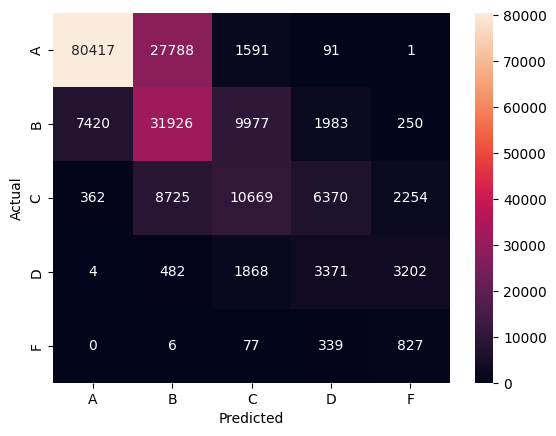

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_c, y_pred_rf_cls)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The confusion matrix shows that most errors occur between adjacent grades, which is expected in real-world academic data. Importantly, the model rarely makes extreme mistakes, such as predicting an F student as A. It also demonstrates improved recall for failing students, making it suitable for early intervention systems.

**Function to predict Score , Grade**

In [55]:
def predict_student(study_hours, attendance, participation):
    X = np.array([[study_hours, attendance, participation]])

    score = rf.predict(X)[0]
    grade_encoded = rf_clf.predict(X)
    grade = le.inverse_transform(grade_encoded)[0]

    return score, grade


**Function Call**

In [59]:
score, grade = predict_student(18, 88, 6)

print("Predicted Score:", round(score, 2))
print("Predicted Grade:", grade)

Predicted Score: 93.02
Predicted Grade: A


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


After training the models, I used them to predict outcomes for new students by passing their study hours, attendance, and participation as inputs. The regression model outputs a numeric score, while the classifier predicts a grade label.